# Import Libraries

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load Data set

In [42]:
data = pd.read_csv("Abnb_paris.csv")  

In [43]:
data.head()

,Unnamed: 0,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
0,1,10,1277,1.041393,3.106531,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,Even if i stayed at another apartment the stay...
1,2,8,279,0.954243,2.447158,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,"Exactly what you can see on the pictures, plus..."
2,3,31,434,1.505150,2.638489,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,We were five colleagues staying in Lea's apart...
3,4,65,784,1.819544,2.894870,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,"It was perfect! The location is great, easy to..."
4,5,9,621,1.000000,2.793790,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,"Saras flat is nice and clean, she was the perf..."


# Preprocesign

# Drop Colums 

In [44]:
columns_to_drop = ['Unnamed: 0', 'logreviews', 'logsavwish']
data.drop(columns=columns_to_drop, inplace=True)

In [45]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
reviews         0
savwish         0
price           0
rating          0
accommodates    0
extpeop         0
min_stay        0
sentiment       0
secdep          0
cleanfee        0
weekfee         0
monthfee        0
bedroom         0
bathroom        0
beds            0
review_text     0
dtype: int64


In [46]:
def convert_sentiment(score):
    if score < 2.5:
        return 'negative'
    elif score > 3.5:
        return 'positive'
    else:
        return 'neutral'

# Preprocess Text

In [47]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return tokens

In [48]:
data['review_text'] = data['review_text'].apply(preprocess_text)

In [49]:
data['review_text']

0     [Even, stayed, another, apartment, stay, perfe...
1     [Exactly, see, pictures, plus, tiny, worthwhil...
2     [five, colleagues, staying, Lea, 's, apartment...
3     [perfect, location, great, easy, find, Eric, h...
4     [Saras, flat, nice, clean, perfect, host, perf...
                            ...                        
61    [first, time, using, airbnb, great, experience...
62    [Phillipe, Thanks, much, lovely, stay, Marais,...
63    [arrived, late, Leece, due, trains, completely...
64    [really, felt, home, nicely, decorated, appart...
65    [Fantastic, stay, jane, Lovely, apartment, lov...
Name: review_text, Length: 66, dtype: object

# TF-IDF

In [50]:

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['review_text'].apply(lambda x: ' '.join(x)))
data['review'] = tfidf_features.toarray().tolist()

In [51]:
data['review'] = data['review_text'].apply(np.array)
data['review_text']


0     [Even, stayed, another, apartment, stay, perfe...
1     [Exactly, see, pictures, plus, tiny, worthwhil...
2     [five, colleagues, staying, Lea, 's, apartment...
3     [perfect, location, great, easy, find, Eric, h...
4     [Saras, flat, nice, clean, perfect, host, perf...
                            ...                        
61    [first, time, using, airbnb, great, experience...
62    [Phillipe, Thanks, much, lovely, stay, Marais,...
63    [arrived, late, Leece, due, trains, completely...
64    [really, felt, home, nicely, decorated, appart...
65    [Fantastic, stay, jane, Lovely, apartment, lov...
Name: review_text, Length: 66, dtype: object

# Train Base Models 

In [52]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

In [53]:

X = data['review_text']
y = data['sentiment']
X = X.apply(lambda x: ' '.join(map(str, x)))
y = y.apply(convert_sentiment)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='linear', probability=True)  # Enable probability estimation
}
for name, model in models.items():
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)

# Base Model Results Confusion Matrix


Naive Bayes Evaluation:
Classification Report:
              precision    recall  f1-score   support

    negative       0.77      1.00      0.87        10
     neutral       1.00      0.25      0.40         4

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.74        14

Confusion Matrix:


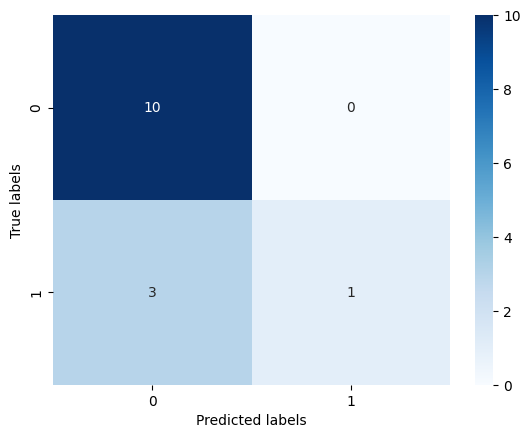


Decision Tree Evaluation:
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.80      0.89        10
     neutral       0.67      1.00      0.80         4

    accuracy                           0.86        14
   macro avg       0.83      0.90      0.84        14
weighted avg       0.90      0.86      0.86        14

Confusion Matrix:


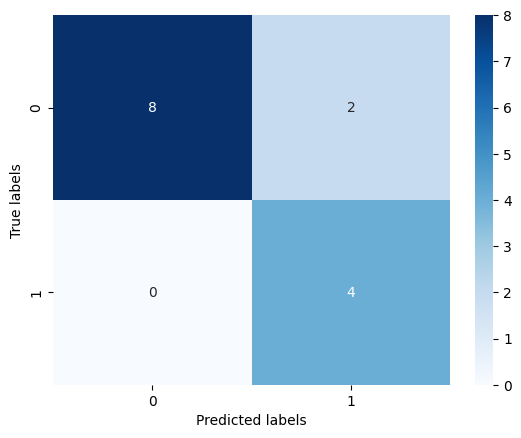


SVM Evaluation:
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.70      0.82        10
     neutral       0.57      1.00      0.73         4

    accuracy                           0.79        14
   macro avg       0.79      0.85      0.78        14
weighted avg       0.88      0.79      0.80        14

Confusion Matrix:


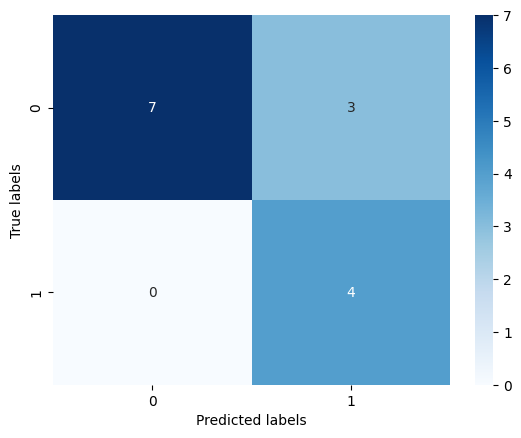

In [55]:
for name, model in models.items():
    if name == "Naive Bayes" or name == "Decision Tree" or name == "SVM":
        print(f"\n{name} Evaluation:")
        evaluate_model(model, X_test_tfidf, y_test)
    else:
        print(f"\n{name} Evaluation:")
        evaluate_model(model, X_test_tfidf, y_test)

# Base Model ROC curve 

c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


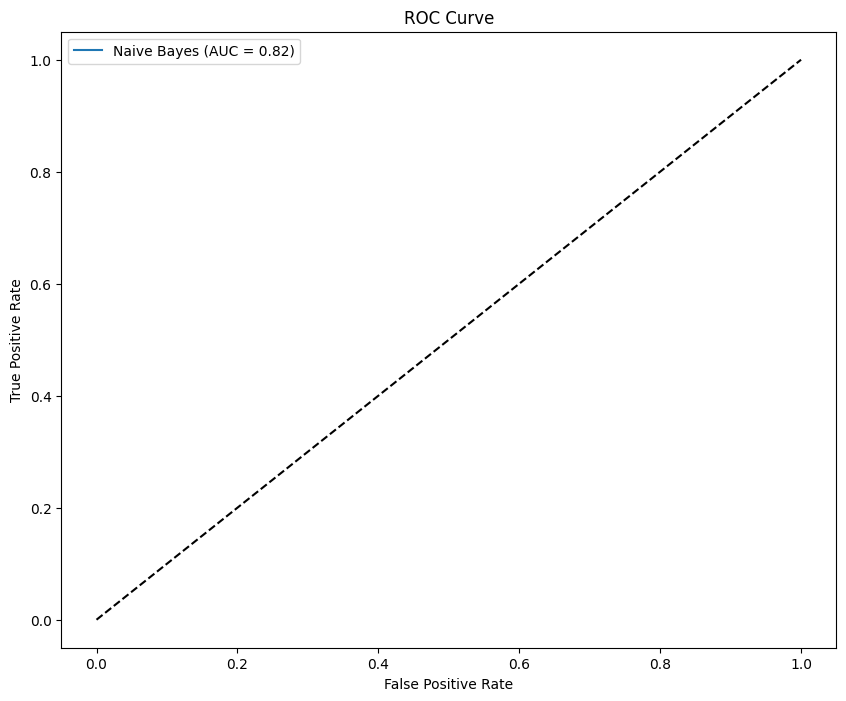

c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


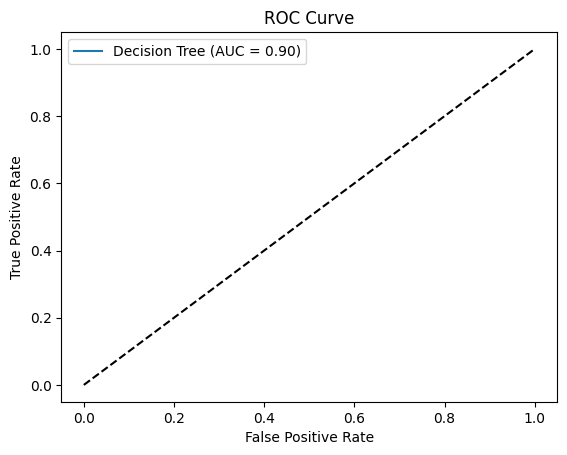

c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


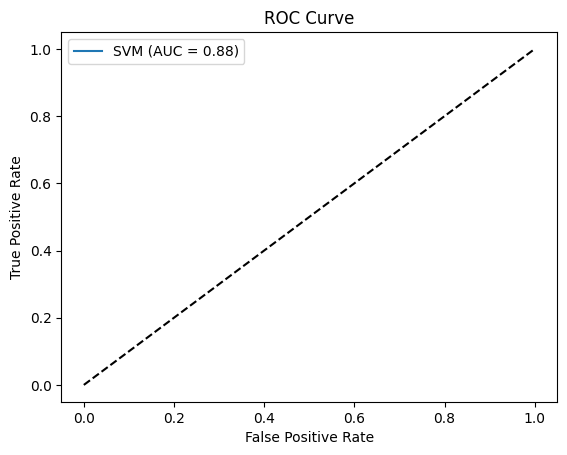

In [56]:
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='positive')
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Bagging: Random Forest classifier

In [57]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_accuracy = rf_model.score(X_test_tfidf, y_test)


Random Forest Evaluation:
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      1.00      0.95        10
     neutral       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.95      0.88      0.90        14
weighted avg       0.94      0.93      0.93        14

Confusion Matrix:


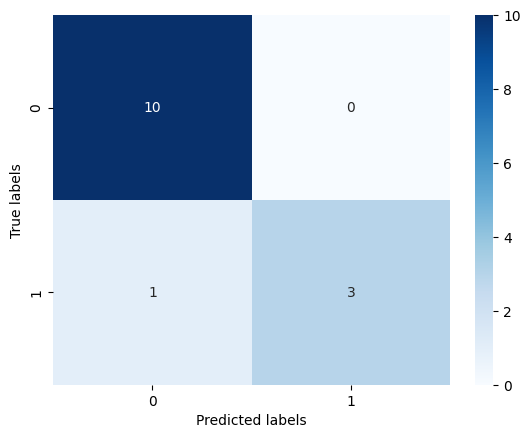

In [58]:
print("\nRandom Forest Evaluation:")
evaluate_model(rf_model, X_test_tfidf, y_test)

c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


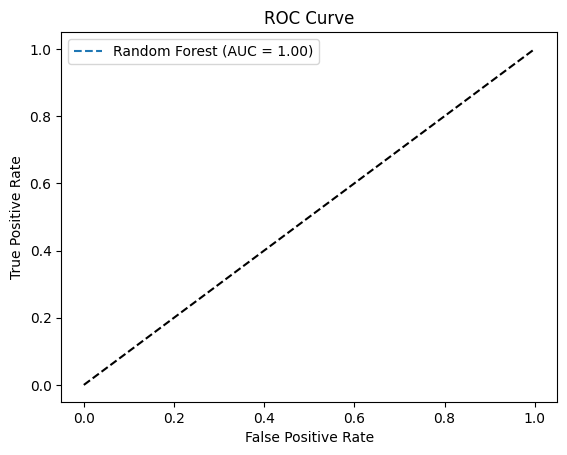

In [59]:
rf_y_pred_proba = rf_model.predict_proba(X_test_tfidf)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_proba, pos_label='positive')
rf_auc_score = roc_auc_score(y_test, rf_y_pred_proba)
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc_score:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Boosting: AdaBoost classifier

In [60]:

adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train_tfidf, y_train)
adaboost_accuracy = adaboost_model.score(X_test_tfidf, y_test)



c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Evaluation:
Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80        10
     neutral       0.50      0.50      0.50         4

    accuracy                           0.71        14
   macro avg       0.65      0.65      0.65        14
weighted avg       0.71      0.71      0.71        14

Confusion Matrix:


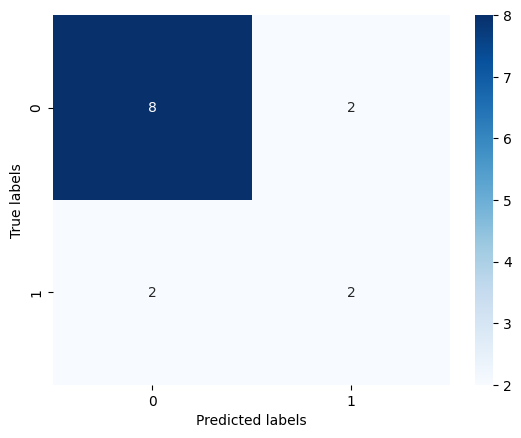

In [61]:
print("\nAdaBoost Evaluation:")
evaluate_model(adaboost_model, X_test_tfidf, y_test)

c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


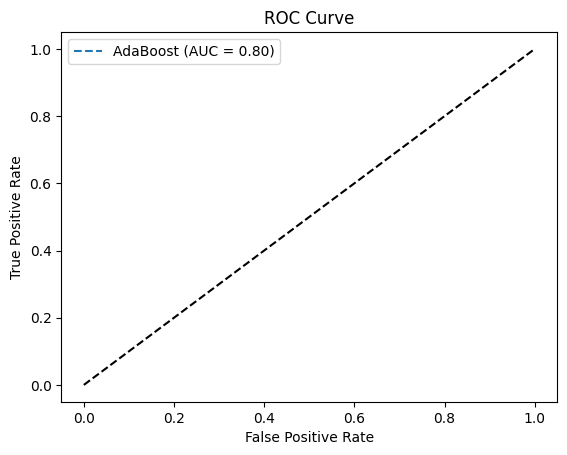

In [62]:
adaboost_y_pred_proba = adaboost_model.predict_proba(X_test_tfidf)[:, 1]
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_y_pred_proba, pos_label='positive')
adaboost_auc_score = roc_auc_score(y_test, adaboost_y_pred_proba)
plt.plot(adaboost_fpr, adaboost_tpr, label=f"AdaBoost (AUC = {adaboost_auc_score:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Stacking: Train a meta-model using predictions from base models.

In [63]:
estimators = [(name, model) for name, model in models.items()]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=100, random_state=42))
stacking_model.fit(X_train_tfidf, y_train)
stacking_accuracy = stacking_model.score(X_test_tfidf, y_test)

c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Stacking Evaluation:
Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.90      0.82        10
     neutral       0.50      0.25      0.33         4

    accuracy                           0.71        14
   macro avg       0.62      0.57      0.58        14
weighted avg       0.68      0.71      0.68        14

Confusion Matrix:


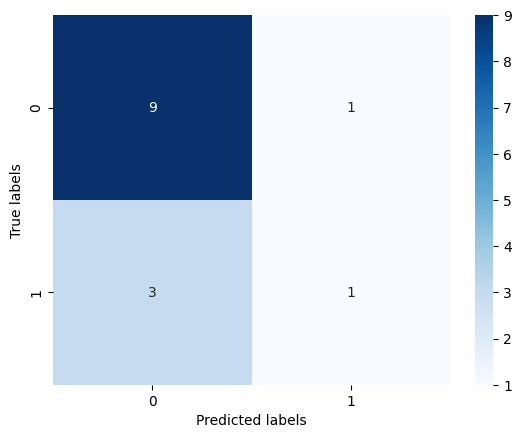

In [64]:
print("\nStacking Evaluation:")
evaluate_model(stacking_model, X_test_tfidf, y_test)

c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


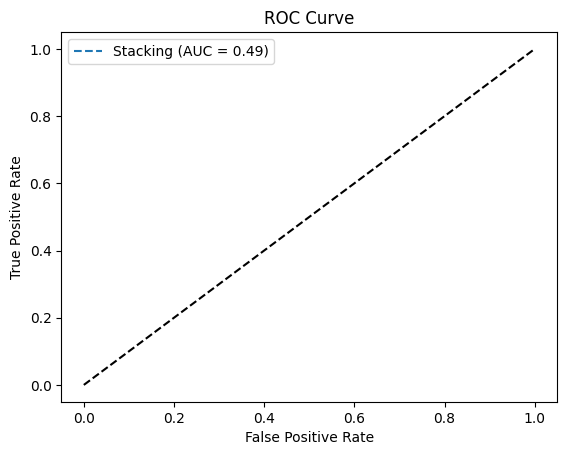

In [65]:
stacking_y_pred_proba = stacking_model.predict_proba(X_test_tfidf)[:, 1]
stacking_fpr, stacking_tpr, _ = roc_curve(y_test, stacking_y_pred_proba, pos_label='positive')
stacking_auc_score = roc_auc_score(y_test, stacking_y_pred_proba)
plt.plot(stacking_fpr, stacking_tpr, label=f"Stacking (AUC = {stacking_auc_score:.2f})", linestyle='--')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()